In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
path = "Dataset/hour.csv"
rides = pd.read_csv(path)
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


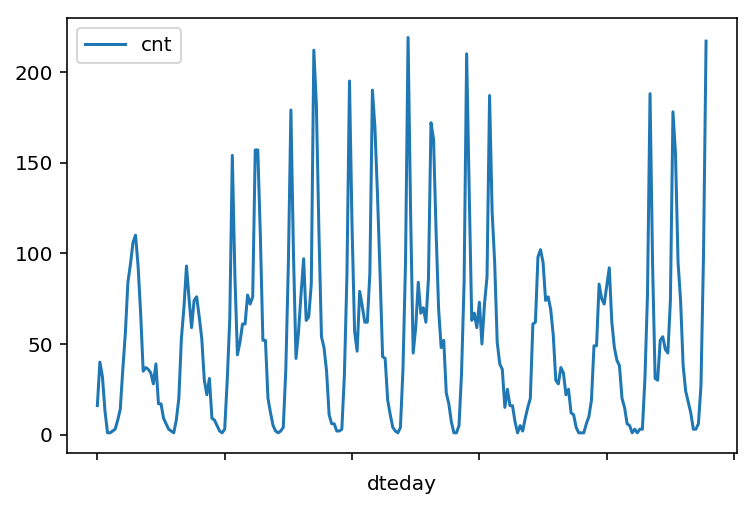

In [71]:
# -- LINE PLOT --

# x = dates from 1 to 10
# y = count of riders(casual + registered)

rides[:24*10].plot(x='dteday', y='cnt')

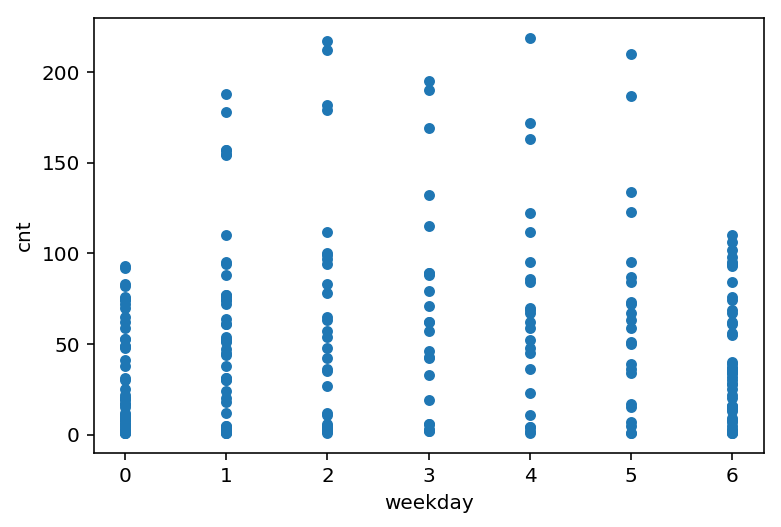

In [79]:
rides[:24*10].plot(kind="scatter", x="weekday", y="cnt")

In [72]:
# categorical variables -> season, weather, month

print("Seasons" ,rides.season.unique(),"\nWeathersit ", rides.weathersit.unique(), "\nMonth ",rides.mnth.unique(),
      "\nHours ",rides.hr.unique(), "\nWeekday ", rides.weekday.unique() )
    
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']

for i in dummy_fields:
    dummies = pd.get_dummies(rides[i], prefix=i, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']

data = rides.drop(fields_to_drop, axis=1)
data.head()

Seasons [1 2 3 4] 
Weathersit  [1 2 3 4] 
Month  [ 1  2  3  4  5  6  7  8  9 10 11 12] 
Hours  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] 
Weekday  [6 0 1 2 3 4 5]


,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [73]:
data.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt', 'season_1', 'season_2', 'season_3', 'season_4', 'weathersit_1',
       'weathersit_2', 'weathersit_3', 'weathersit_4', 'mnth_1', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4',
       'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12',
       'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20',
       'hr_21', 'hr_22', 'hr_23', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [74]:
# -- SCALE THE TARGET VARIABLES ~To make training the network easier --

## standardization of continuous variables
## shifting and scaling the variables, to have zero mean and a standard deviation of 1.

quantitative_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']

# Storing scalings
scaled_features = {}

for i in quantitative_features:
    mean, std = data[i].mean(), data[i].std()
    scaled_features[i] = [mean, std]
    data.loc[:, i] = (data[i] - mean)/std
    

In [75]:
# -- SPLIT THE DATA --

## Splitting the data into training, testing, and validation sets
# Save data for approximately the last 21 days 

test_data = data[-21*24:]
test_data.head()


# Now remove the test data from the data set 
data = data[:-21*24]

# Separate the data into features and targets
target_fields = ['cnt', 'casual', 'registered']

features, targets = data.drop(target_fields, axis=1), data[target_fields]

test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]